<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de Datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Visualización de redes

Este notebook explora las funcionalidades de generación de visualizaciones de grafos de la librería networkX.

En primer lugar, se presenta la función básica de visualización de grafos y se detallan algunos de los parámetros que permiten ajustar las propiedades de esta visualización.

En segundo lugar, se exponen algunos de los algoritmos de posicionamiento de nodos más populares, que se usan para decidir dónde situar cada uno de los nodos del grafo en la imagen.

Después, se detallan algunas funciones de exportación de grafos, que permiten usar grafos networkx en programas especializados de visualización de grafos.

Finalmente, se presenta un ejemplo del proceso de creación de una visualización de un grafo de mayor tamaño. 

Recordad que podéis ir ejecutando los ejemplos que se incluyen en los notebooks para reproducirlos y obtener sus resultados. Además, os animamos a que modifiquéis el código de los ejemplos y ejecutéis vuestras modificaciones, para ir explorando todo el potencial de las librerías que se presentan en los notebooks y los algoritmos que se detallan.

## 1. Visualización básica de grafos

Networkx dispone de la función [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) que permite generar una visualización de un grafo. La función recibe como único parámetro obligatorio el grafo que se quiere dibujar, y genera la imagen resultante. Veamos un ejemplo sencillo:

In [1]:
# Activamos matplotlib e indicamos que se muestren los plots en el mismo notebook
# usando un 'magic command' de Jupyter
%matplotlib inline

# Importamos networkx, pyplot y numpy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

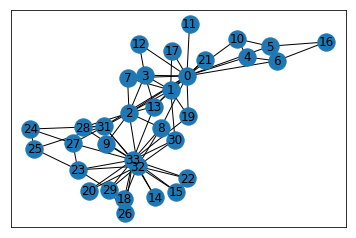

In [2]:
# Cargamos y visualizamos el grafo del club de karate
g = nx.karate_club_graph()
nx.draw_networkx(g)

En vez de visualizar la imagen del grafo en el notebook, también podemos crear un archivo con la imagen del grafo, que podemos usar después fuera del notebook:

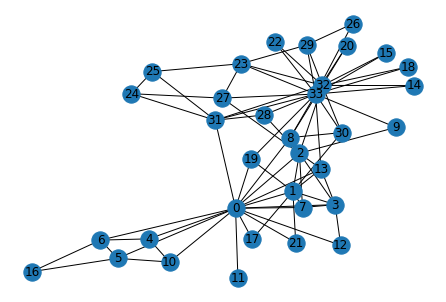

In [3]:
# Guardamos la imagen en el archivo karate_club.png
nx.draw(g, with_labels=True)
plt.savefig("karate_club.png")

## 2. Ajustar la visualización

La función [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) dispone de multitud de parámetros opcionales que permiten ajustar las propiedades de la visualización que se va a generar. Así, por ejemplo, el parámetro `with_labels` permite controlar si las etiquetas de los nodos se incluyen o no en la imagen:

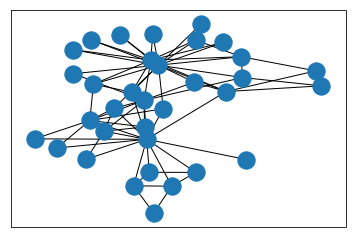

In [4]:
# Mostramos un grafo sin incluir las etiquetas de los nodos
nx.draw_networkx(g, with_labels=False)

Por lo contrario, a menudo es útil incluir etiquetas en el grafo, pero las etiquetas que queremos visualizar no coinciden con los identificadores de los nodos. En este caso, una posible alternativa pasa por renombrar los nodos del grafo:

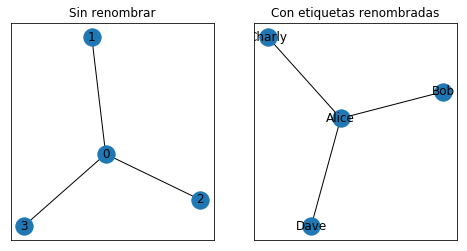

In [5]:
# Generamos un grafo estrella de 4 nodos
g = nx.star_graph(3)
plt.figure(num=None, figsize=(8, 4))

# Mostramos el grafo con las etiquetas originales
ax = plt.subplot(1, 2, 1)
plt.title("Sin renombrar")
nx.draw_networkx(g)

# Mostramos el grafo con las etiquetas renombradas
ax = plt.subplot(1, 2, 2)
plt.title("Con etiquetas renombradas")
names = ['Alice', 'Bob', 'Charly', 'Dave']
g2 = nx.relabel_nodes(g, {i:name for i, name in enumerate(names)})
nx.draw_networkx(g2)

Se puede ajustar el tamaño, el color, la transparencia y la forma geométrica que representa cada nodo con los parámetros `node_size`, `node_color`, `alpha`, `node_shape`, respectivamente:

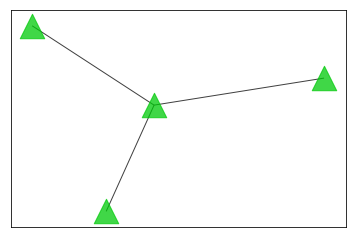

In [6]:
# Mostramos un grafo sin etiquetas, fijando el color, tamaño y forma de los nodos
nx.draw_networkx(g, with_labels=False, node_size=600, node_color="#00CA09", node_shape="^", alpha=0.75)

De una manera similar, también podemos ajustar el color de las aristas (`edge_color`) y su grosor (`width`):

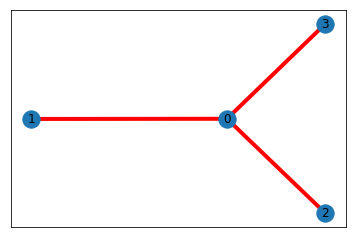

In [7]:
# Mostramos un grafo con aristas rojas de grosor 4
nx.draw_networkx(g, edge_color='r', width=4)

Si incluimos las etiquetas de los nodos en la imagen, entonces podemos configurar también su tamaño (`font_size`), color (`font_color`), tipo (`font_weight`) y família (`font_family`):

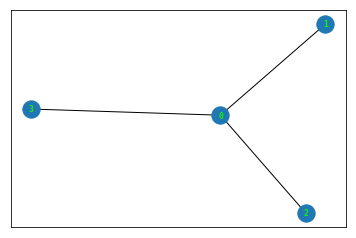

In [8]:
# Mostramos un grafo con etiquetas ajustando sus propiedades
nx.draw_networkx(g, font_size=8, font_color='#1DEE04', font_weight='bold', font_family='monospace')            

Si el grafo es dirigido, entonces podemos visualizar la dirección de las aristas fijando el parámetro `arrows` a `True`:

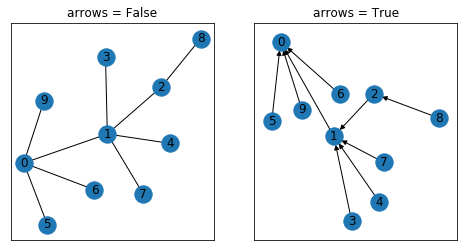

In [9]:
# Generamos un grafo dirigido
g = nx.gn_graph(10)

plt.figure(num=None, figsize=(8, 4))

# Mostramos el grafo especificando si queremos visualizar o no las direcciones de las aristas
ax = plt.subplot(1, 2, 1)
plt.title("arrows = False")
nx.draw_networkx(g, arrows=False)

ax = plt.subplot(1, 2, 2)
plt.title("arrows = True")
nx.draw_networkx(g, arrows=True)

Fijaos que, aunque el grafo sea dirigido, si no especificamos explícitamente que queremos mostrar la dirección de los arcos, entonces esta no se visualiza.

La función [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) también permite especificar un subconjunto de nodos o aristas del grafo que quiere dibujarse. Esto puede ser útil para visualizar solo una parte del grafo, o bien para aplicar propiedades distintas a diferentes elementos del grafo. Por ejemplo, podemos mostrar en colores distintos los nodos en función de su grado:

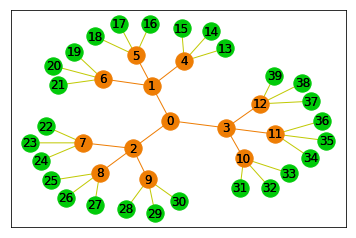

In [10]:
# Creamos un árbol balanceado
g = nx.balanced_tree(3, 3)

# Creamos una lista con los nodos de grado 1 y otra con los nodos de grado diferente a 1
deg_one = [n for n, d in dict(g.degree()).items() if d == 1]
deg_not_one = [n for n, d in dict(g.degree()).items() if d != 1]
pos = nx.kamada_kawai_layout(g)

# Creamos una lista con las aritas que tienen algún nodo de grado 1 y otra con el resto
edge_one = [e for e in g.edges() if e[0] in deg_one or e[1] in deg_one]
edge_not_one = [e for e in g.edges() if e not in edge_one]

# Mostramos los nodos y aristas en dos colores
nx.draw_networkx(g, pos=pos, nodelist=deg_one, node_color="#00CA09", edgelist=edge_one, edge_color="#C1CA04")
nx.draw_networkx(g, pos=pos, nodelist=deg_not_one, node_color="#EE7D04", edgelist=edge_not_one, edge_color="#EE7D04")

Además de la función [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html), networkx también dispone de las funciones [`draw_networkx_nodes`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes) y [`draw_networkx_edges`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_edges) que permiten visualizar, respectivamente, los nodos y las aristas del grafo. El mismo comportamiento de estas funciones puede conseguirse ajustando los parámetros de [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html), como hemos visto anteriormente. 

## 3.  Algoritmos de posicionamiento de los nodos

### 3.1 La necesidad de buenos algoritmos de posicionamiento de nodos

A la hora de generar una visualización del grafo, la posición de los nodos en el plano es un detalle crucial: un buen posicionamiento nos facilitará la lectura del grafo, así como la interpretación de la información que queramos transmitir al generar la visualización.

Así, por ejemplo, podemos comparar las siguientes dos visualizaciones de un grafo estrella:

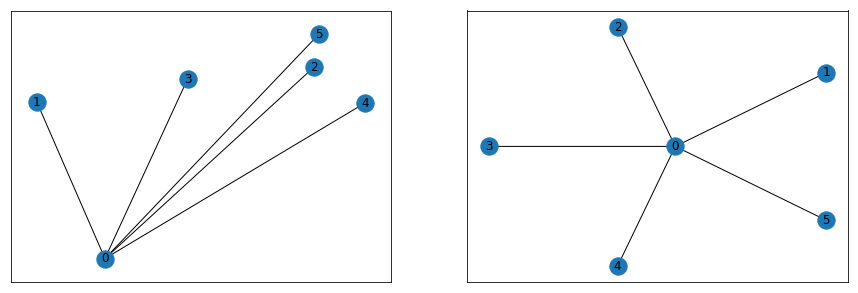

In [11]:
g = nx.star_graph(5)

# Creamos tres visualizaciones del grafo 1, utilizando el tamaño de los nodos para indicar el grado,
# la centralidad de intermediación y la centralidad de proximidad, respectivamente
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 2, 1)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 2, 2)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)


Mientras que observando la visualización de la izquierda, tardamos unos segundos en identificar que se trata de un grafo estrella y que el nodo 0 es el nodo central al que están conectados el resto de los nodos del grafo, llegar a esta misma conclusión observando la imagen de la derecha es casi inmediato.

Veamos un ejemplo aún más exagerado: ¿seríais capaces de responder a las siguientes preguntas sobre el grafo que se presenta a continuación?

1. ¿Cuál es el nodo con mayor centralidad de intermediación?
2. ¿Cuántos nodos tiene el grafo?
3. ¿Cuántos nodos de grado 3 tiene el grafo?
4. ¿Existe alguna estructura de comunidades en el grafo?

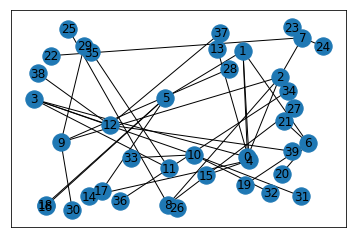

In [12]:
g = nx.balanced_tree(3, 3)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

La verdad es que responder a cualquiera de las preguntas anteriores a partir de la visualización del grafo es una tarea tediosa, en la que es fácil cometer errores. En cambio, si ajustamos la posición de los nodos del grafo, veremos que las preguntas planteadas se pueden responderse con facilidad: 

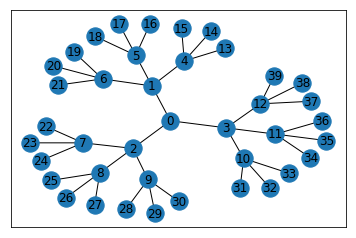

In [13]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)

### 3.2 Especificar posiciones con networkx

Las funciones de dibujo de grafos de networkx (draw_networkx, draw_networkx_nodes, draw_networkx_edges) reciben como parámetro `pos`, un diccionario con las posiciones de los nodos (las claves del diccionario son los nodos, y los valores corresponden a un *array* con las coordenadas de la posición en las que mostrar cada nodo). 

In [14]:
# Importamos pprint, que nos permite printar diccionarios de manera que sean
# fáciles de leer
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [15]:
# Creamos un grafo estrella
g = nx.star_graph(4)
# Mostramos las posiciones de los nodos según el algoritmo de layout Kamada-Kawai 
pos = nx.kamada_kawai_layout(g)
pp.pprint(pos)

{   0: array([-2.45231554e-07,  1.76278535e-07]),
    1: array([0.99999917, 0.99999962]),
    2: array([-0.99999922,  0.99999974]),
    3: array([-0.99999913, -1.        ]),
    4: array([ 0.99999943, -0.99999954])}


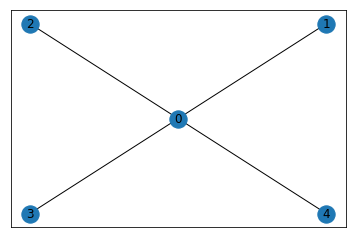

In [16]:
# Mostramos el grafo resultante
nx.draw_networkx(g, pos=pos)

Podemos ajustar la posición de un nodo en la imagen simplemente modificando los valores del *array* de posiciones. El primero de los valores del *array* permite modificar la posición horizontal del nodo (coordenada x), mientras que el segundo valor modifica la posición vertical del nodo (coordenada y): 

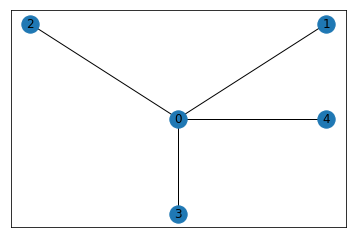

In [17]:
# Fijamos la coordenada x del nodo 3 a 0:
pos[3][0] = 0
# Fijamos la coordenada y del nodo 4 a 0:
pos[4][1] = 0
# Mostramos el grafo
nx.draw_networkx(g, pos=pos)

### 3.3 Algoritmos de posicionamiento de nodos

Especificar manualmente la posición de los nodos no es viable cuando el tamaño del grafo crece, o incluso cuando tenemos claro qué queremos visualizar pero no cuál es la posición ideal de cada nodo para conseguir nuestro objetivo. Aun cuando el grafo es pequeño, a menudo queremos generar una visualización de manera automática a partir de unos criterios generales.

Por todo ello, normalmente generamos visualizaciones de los grafos utilizando un algoritmo de *layout*, que calcula las posiciones de los nodos en base a unas pautas. En esta sección, presentaremos algunos de los algoritmos de *layout* que incorpora la librería `networkx`.

Uno de los algoritmos más básicos de *layout* consiste en asignar las posiciones de los nodos de manera uniformemente aleatoria. Diferentes ejecuciones del algoritmo darán lugar a posicionamientos de los nodos distintos. La función [`random_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html#networkx.drawing.layout.random_layout) implementa este comportamiento:

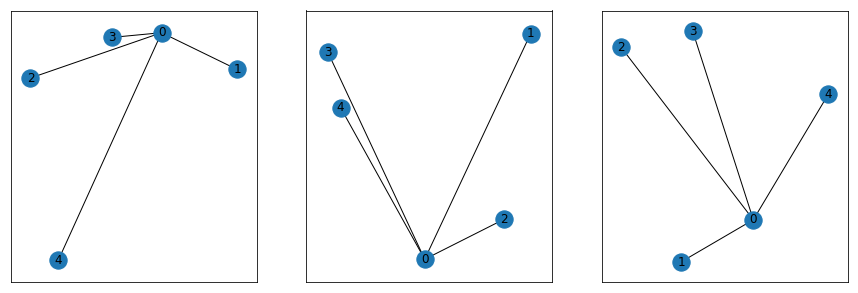

In [18]:
# Creamos tres visualizaciones del grafo 1, utilizando el tamaño de los nodos para indicar el grado,
# la centralidad de intermediación y la centralidad de proximidad, respectivamente
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

El inconveniente principal de este algoritmo de *layout* es que los nodos son situados sin tener en cuenta sus propiedades dentro del grafo (grado, centralidad, comunidad a la que pertenecen, etc.), y que los nodos pueden solaparse. Por este motivo, este *layout* no acostumbra a ser una buena opción para facilitar la interpretabilidad del grafo. Ahora bien, el algoritmo es muy sencillo de implementar y permite obtener una primera visualización del grafo.

Otro algoritmo simple es el que genera un *layout* circular ([`circular_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html#networkx.drawing.layout.circular_layout)), en el cual los nodos se posicionan encima de una circumferencia (que no se dibuja explícitamente), de manera que la distancia entre cada par de nodos consecutivos es la misma:

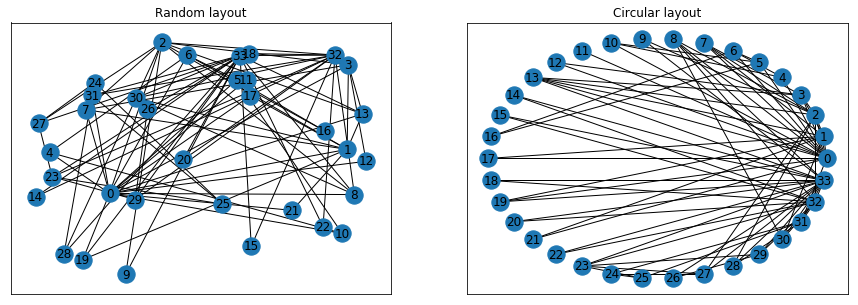

In [19]:
# Creamos dos visualizaciones del grafo del club de karate, usando 
# un layout aleatorio y uno de circular
plt.figure(num=None, figsize=(15, 5))
g = nx.karate_club_graph()

ax = plt.subplot(1, 2, 1)
plt.title("Random layout")
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 2, 2)
plt.title("Circular layout")
pos = nx.circular_layout(g)

nx.draw_networkx(g, pos=pos)

Con respecto al posicionamiento aleatorio de los nodos, la disposición circular genera una imagen más ordenada del grafo, que permite dilucidar a primera vista cuáles son los nodos de mayor grado y a qué otros nodos están conectados. 

Además, al usar un *layout* circular, todos los nodos tienen una posición similar en la imagen generada: no hay ningún nodo con una posición privilegiada como podría ser, por ejemplo, el centro de la imagen. Esto evita la tendencia a percibir un nodo del grafo como más central o más importante, simplemente porqué está situado en una posición concreta de la imagen.

Existe una variante del *layout* circular en el que los nodos se sitúan sobre diferentes círculos concéntricos: el algoritmo de *shell* ([`shell_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.shell_layout.html#networkx.drawing.layout.shell_layout)). Veámos un ejemplo de una visualización de un grafo usando un posicionamiento aleatorio, circular y de *shell* con dos círculos concéntricos:


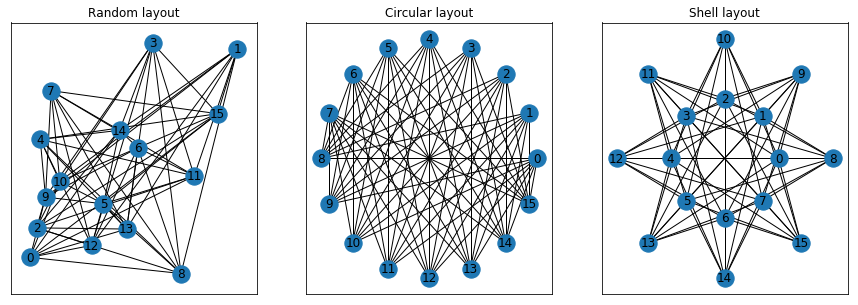

In [20]:
# Comparamos un layout aleatorio, uno circular, y el layout shell con dos niveles
plt.figure(num=None, figsize=(15, 5))
g = nx.complete_bipartite_graph(8, 8)

ax = plt.subplot(1, 3, 1)
plt.title("Random layout")
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)
plt.title("Circular layout")
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
plt.title("Shell layout")
shells = [range(8), range(8, 16)]
pos = nx.shell_layout(g, shells)
nx.draw_networkx(g, pos=pos)

De nuevo, a partir del posicionamiento aleatorio (imagen de la izquierda) es difícil decir nada sobre el grafo. En cambio, con el posicionamiento circular (imagen del centro), podemos intuir cierto comportamiento regular en el grafo: podemos ver que todos los nodos tienen el mismo grado, y las aristas parecen seguir algún patrón que se repite para cada nodo. Con el posicionamiento de *shell* (imagen de la derecha), se puede descubrir más información sobre este patrón: todos los nodos que se encuentran en la circunferencia exterior están únicamente conectados a los nodos de la circunferencia interior, pero no entre ellos.

Así, el *layout* de *shell* puede ser útil cuando queremos resaltar algunas propiedades de algún grupo de nodos. Además, también es útil cuando necesitamos mostrar un número de nodos elevado en una imagen de un tamaño prefijado (fijaros que, con relación al posicionamiento circular, pueden incluirse más nodos en una imagen del mismo tamaño sin que se solapen entre ellos).

Siguiendo con las propiedades del grafo que estamos visualizando, la imagen de la derecha nos muestra claramente que no hay ninguna arista entre los nodos de la circunferencia exterior, pero no queda muy claro si esto mismo ocurre con los nodos de la circunferencia interior. Para este tipo de situaciones, se puede usar un posicionamiento bipartito, que sitúa los nodos en dos grupos (dibujándolos sobre dos líneas rectas):

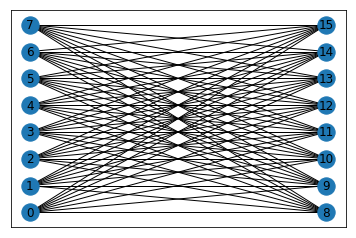

In [21]:
# Mostramos el grafo usando un layout bipartito
pos = nx.bipartite_layout(g, nodes=shells[0])
nx.draw_networkx(g, pos=pos)

Con esta visualización, es evidente que los nodos de ambos grupos no tienen aristas entre los miembros del propio grupo, es decir, se trata de un grafo bipartito.

Hasta ahora hemos presentado algunos algoritmos simples de posicionamiento de nodos. Veamos ahora otros algo más complejos. El algoritmo de posicionamiento planar ([`planar_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html#networkx.drawing.layout.planar_layout)) genera un *layout* en el que no hay aristas que se crucen entre ellas:

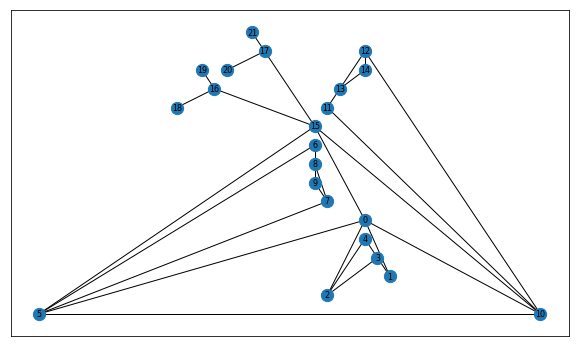

In [22]:
# Creamos un grafo planar uniendo grafos simples
g1 = nx.house_graph()
g2 = nx.house_graph()
g3 = nx.house_graph()
g4 = nx.balanced_tree(2, 2)

g = nx.disjoint_union(nx.disjoint_union(nx.disjoint_union(g1, g2), g3), g4)
g.add_edges_from([(0, 5), (5, 10), (0, 10), (10, 15), (5, 15), (0, 15)])

# Mostramos el grafo sin cruces en las aristas
plt.figure(num=None, figsize=(10, 6))
pos = nx.planar_layout(g)

nx.draw_networkx(g, pos=pos, node_size=150, font_size=8)

Esto solo será posible si el grafo es planar (o plano) y, en caso contrario, la función lanzará una excepción indicándolo:

In [23]:
try:
    # Añadimos 3 aristas al grafo anterior, de manera que deje de ser planar
    g_notplanar = g.copy()
    g_notplanar.add_edges_from([(2, 16), (2, 12), (2, 8)])
    # Intentamos generar un layout planar para el grafo
    pos = nx.planar_layout(g_notplanar)
except nx.NetworkXException:
    print("El grafo no es planar: no es posible generar una visualización sin cruces de aristas")

El grafo no es planar: no es posible generar una visualización sin cruces de aristas


Más allá del algoritmo de *layout*, networkx también dispone de una función para comprobar si un grafo es planar. 

In [24]:
# Comprobamos si los grafos son planares con la función check_planarity
is_planar, _ = nx.check_planarity(g)
print("El grafo original es planar: {}".format(is_planar))
is_planar, _ = nx.check_planarity(g_notplanar)
print("El grafo con las 3 aristas adicionales es planar: {}".format(is_planar))

El grafo original es planar: True
El grafo con las 3 aristas adicionales es planar: False


Un conjunto de algoritmos de posicionamiento de nodos bastante usado para generar grafos estéticamente buenos es el de los algoritmos dirigidos por fuerza, que toman su nombre del hecho que se basan en asignar fuerzas entre nodos o aristas del grafo, y usan estas fuerzas para calcular las posiciones del nodo. Algunos de los criterios estéticos que intentan conseguir estos algoritmos son minimizar el número de cruces de aristas, hacer que la longitud de las aristas sea similar, o intentar reflejar la simetría del grafo.

Estos algoritmos se describen habitualmente con una metáfora que involucra muelles. Los nodos del grafo son visualizados como ruedas de acero, que se encuentran conectadas entre ellas con muelles en sustitución de las aristas. Inicialmente, los nodos se sitúan aleatoriamente en el plano y, después, se dejan ir, dejando que las fuerzas de los muelles actúen y determinen la posición final de los nodos (que será un estado de energía mínimo).

Los algoritmos de esta familia se diferencian entre ellos en detalles como qué fuerzas se aplican, cómo se recalculan, o cómo se optimiza su cálculo para poderlos aplicar a grafos grandes.

La función [`spring_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) implementa el algoritmo dirigido por fuerza de Fruchterman-Reingold. Vamos a generar tres visualizaciones del mismo grafo usando esta función:

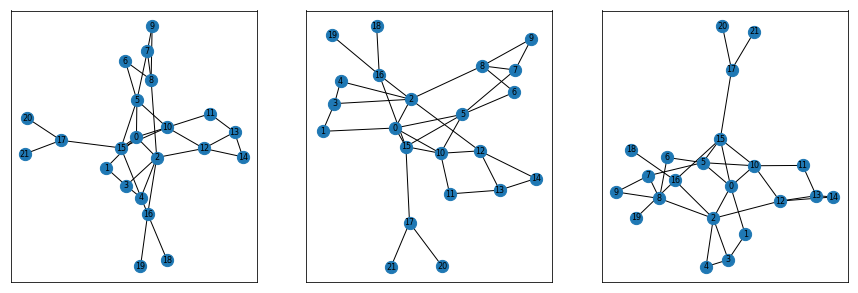

In [25]:
# Mostramos tres ejecuciones del algoritmo de layout spring para un mismo grafo
plt.figure(num=None, figsize=(15, 5))

for i in range(1, 4):
    ax = plt.subplot(1, 3, i)
    pos = nx.spring_layout(g_notplanar)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

Fijaos que, en primer lugar, las visualizaciones generadas tienen cierto parecido entre ellas, pero la componente aleatoria del algoritmo hace que las imágenes generadas difieran. En segundo lugar, las aristas del grafo tienen una longitud similar y, aunque hay algún cruce entre ellas, no son muchos y no entorpecen la visualización del grafo.

El algoritmo de Fruchterman-Reingold es iterativo, de manera que el estado de energía mínima se va aproximando con cada nueva iteración. Veamos pues cómo influye el número de iteraciones en la visualización final del grafo:

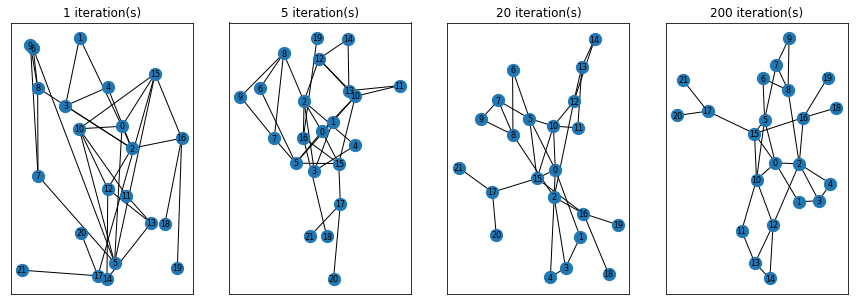

In [26]:
# Mostramos cuatro ejecuciones del algoritmo de layout spring para un mismo grafo,
# variando el número de iteraciones que han de ejecutarse en el algoritmo
plt.figure(num=None, figsize=(15, 5))

iterations = [1, 5, 20, 200]
for i, its in enumerate(iterations):
    ax = plt.subplot(1, 4, i+1)
    plt.title("{} iteration(s)".format(its))
    pos = nx.spring_layout(g_notplanar, iterations=its)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

La función [`spring_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) dispone de otros parámetros adicionales que permiten ajustar la ejecución del algoritmo. Así, por ejemplo, el parámetro `k` permite especificar la distancia óptima entre los nodos del grafo:

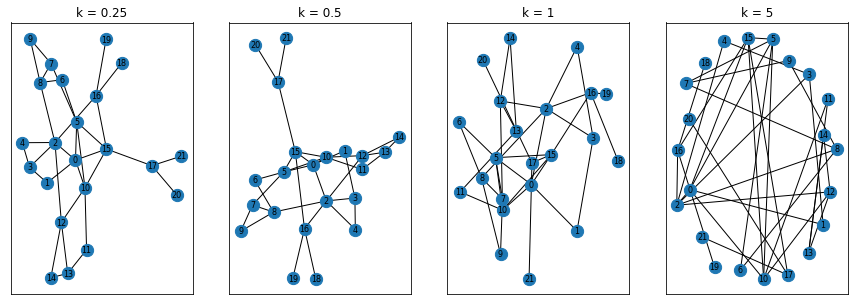

In [27]:
# Mostramos cuatro ejecuciones del algoritmo de layout spring para un mismo grafo,
# variando el valor de la distancia óptima entre nodos
plt.figure(num=None, figsize=(15, 5))

ks = [0.25, 0.5, 1, 5]
for i, k in enumerate(ks):
    ax = plt.subplot(1, 4, i+1)
    plt.title("k = {}".format(k))
    pos = nx.spring_layout(g_notplanar, k=k)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

Otro de los algoritmos dirigidos por fuerza es el algoritmo de Kamada-Kawai, implementado por la función [`kamada_kawai_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html#networkx.drawing.layout.kamada_kawai_layout) de networkx:

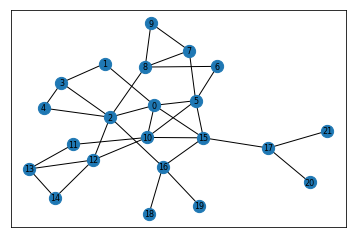

In [28]:
# Mostramos el grafo con un layout calculado con Kamada-Kawai
plt.figure(num=None, figsize=(6, 4))
pos = nx.kamada_kawai_layout(g_notplanar)
nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

Hasta ahora hemos usado funciones de *layout* que calculan la posición de los nodos, y después hemos utilizado estas posiciones para generar la imagen del grafo. Ahora bien, también existen funciones que implementan ambas funcionalidades:

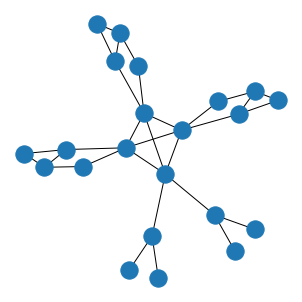

In [29]:
# Usamos draw_spring para generar una visualización de un grafo usando el
# algoritmo de layout spring
plt.figure(num=None, figsize=(4, 4))
nx.draw_spring(g)

## 4. Uso de software externo

En ocasiones necesitaremos generar visualizaciones de grafos que, por las características del grafo o de la propia visualización, serán difíciles de generar usando networkx. En estos casos, es habitual exportar el grafo a un fichero de texto usando alguno de los formatos de descripción de grafos e importarlo después en el software específico de visualización, por ejemplo [gephi](https://gephi.org/). No hay un único formato estándar de descripción de grafos, pero algunos de los más populares son `gml`, `graphml` o `gexf`. Podéis encontrar la lista completa de formatos para los cuales networkx incluye funciones de lectura y escritura en la [documentación oficial de networkx](https://networkx.github.io/documentation/stable/reference/readwrite/index.html).

In [30]:
# Exportamos el grafo g a gml, graphml y gexf
nx.write_gml(g, "./graph.gml")
nx.write_graphml(g, "./graph.graphml")
nx.write_gml(g, "./graph.gexf")

## 5. Un ejemplo completo

Para acabar, veremos un ejemplo completo de creación de una visualización de un grafo. En concreto, usaremos el conjunto de datos [soc-wiki-Vote](http://networkrepository.com/soc-wiki-Vote.php), que contiene los votos de la wikipedia desde sus inicios hasta enero de 2008. Los nodos de la red son usuarios de wikipedia, y un arco del usuario $u_i$ al usuario $u_j$ indica que el usuario $u_i$ votó al usuario $u_j$.

En primer lugar, cargamos los datos y mostramos las propiedades básicas del grafo. Para empezar, obviaremos la dirección de las aristas (usaremos un grafo no dirigido para representar los datos):

In [31]:
# Cargamos los datos en un grafo (soc-wiki-Vote.mtx contiene los datos como una lista de aristas)
g = nx.read_edgelist("data/soc-wiki-Vote.mtx", comments='%')
print("The graph has {} nodes and {} edges".format(g.number_of_nodes(), g.size()))

The graph has 889 nodes and 2914 edges


Para tener una primera idea de cómo es el grafo, podemos intentar generar una imagen con la posición de los nodos seleccionada aleatoriamente y usando los valores por defecto de todos los parámetros de visualización:

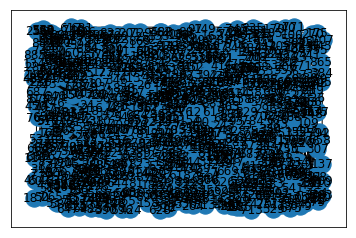

In [32]:
# Mostramos el grafo usando un layout aleatorio
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

La imagen es nefasta, en el sentido de que es incapaz de transmitir ninguna información sobre el grafo, más allá de poder afirmar que el número de nodos es superior al centenar. 

Para intentar mejorar la visualización, reduciremos el tamaño de los nodos, los haremos semitransparentes y eliminaremos las etiquetas. Esto debería permitir empezar a ver las aristas del grafo, que no se ven en la imagen anterior por la gran cantidad de espacio que ocupan los nodos. Además, aplicaremos un algoritmo de posicionamiento de los nodos dirigido por fuerza, para intentar minimizar cruces de aristas y generar una imagen estéticamente agradable. Por último, destinaremos un poco más de espacio a visualizar la imagen:

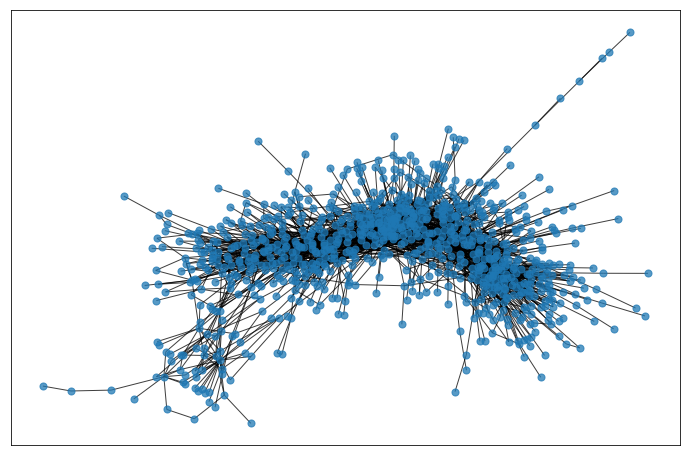

In [33]:
# Ajustamos los parámetros de visualización de nodos
# y el algoritmo de layout
plt.figure(num=None, figsize=(12, 8))
pos = nx.spring_layout(g, seed=41)
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=50, alpha=0.75)

Ahora podemos distinguir la mayoría de los nodos y podemos ver que la red es conexa y bastante densa. Existen algunos nodos que tienen grado 1, pero la gran mayoría tienen un grado superior.

Vamos a colorear los nodos en función de la comunidad a la que pertenecen, detectando las comunidades con la función [`greedy_modularity_communities`](https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html):

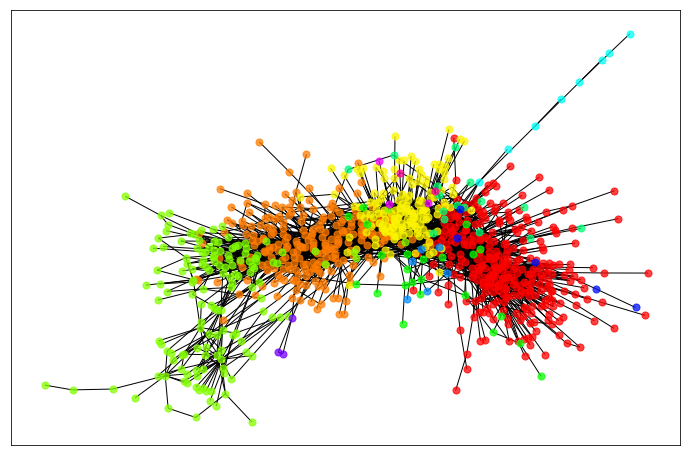

In [34]:
from networkx.algorithms import community as nxcom

# Coloreamos los nodos según la comunidad detectada a la que pertenecen

plt.figure(num=None, figsize=(12, 8))

com_mod = nxcom.greedy_modularity_communities(g)
nx.draw_networkx_edges(g, pos=pos)
for i, group in enumerate(com_mod):
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[plt.cm.hsv(i/len(com_mod))], 
                           node_size=50, alpha=0.75)

Como podemos apreciar, el algoritmo de *layout* es bastante bueno posicionando los nodos que pertenecen a la misma comunidad próximos entre ellos. Se distinguen claramente cuatro comunidades bastante grandes y algunas comunidades pequeñas que contienen unos pocos nodos.

Por lo que respecta a la visualización, hay algunos nodos que se solapan y, aunque hayamos aplicado transparencia a los colores de estos, en las zonas más pobladas cuesta distinguir la cantidad de nodos que se muestran. Una posible manera de mejorar este detalle es mostrar el contorno de los nodos, usando un color un poco más fuerte que el que se utiliza en el interior.

Además, aunque la imagen anterior permite identificar fácilmente los nodos de grado 1, es difícil identificar los *hubs* del grafo. Vamos a cambiar el tamaño de los nodos, de manera que dependa del grafo del nodo, mostrando así con mayor tamaño los nodos con mayor grado:

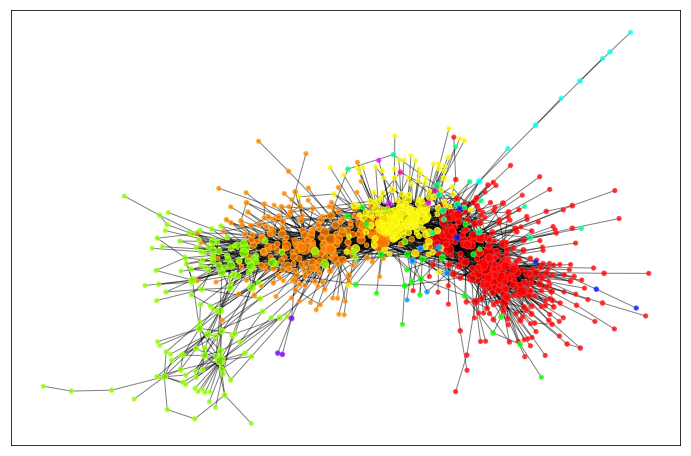

In [35]:
# Mostramos el contorno de los nodos y asignamos el tamaño del nodo
# en función de su grado

plt.figure(num=None, figsize=(12, 8))

nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=[min(1, e+0.2) for e in cmap(i/len(com_mod))])

En cuanto a la identificación individual de cada nodo, aunque esta ha mejorado, aún es difícil distinguir los nodos rojos y amarillos. Una posible alternativa pasaría por modificar los colores usados para representar cada comunidad. Otra alternativa podría ser cambiar el color del borde de los nodos, para favorecer que puedan distinguirse:

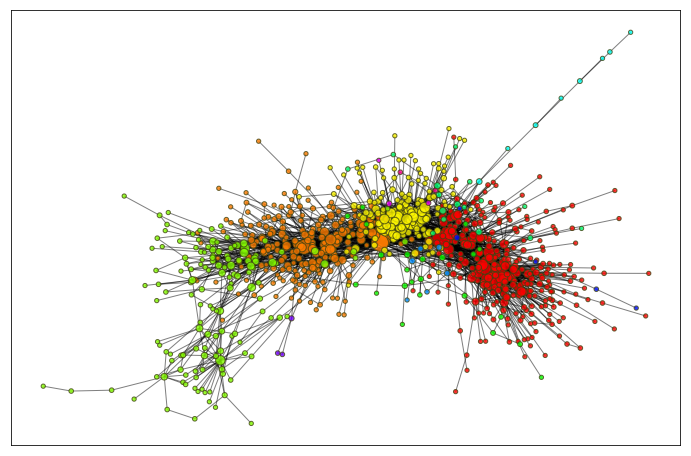

In [36]:
# Coloreamos el contorno de los nodos en gris
plt.figure(num=None, figsize=(12, 8))
nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=["#414412"])

Efectivamente, en la imagen anterior podemos distinguir claramente los nodos e identificar cuáles tienen un mayor grado.

Al inicio de este ejemplo, hemos decidido obviar la dirección de las aristas del grafo. Vamos a intentar recuperar esta información e incluirla en la visualización generada. En primer lugar, cargaremos el grafo usando también la función [`read_edge_list`](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html), pero especificando explícitamente que se trata de un grafo dirigido: 

In [37]:
# Cargamos el grafo explicitando que sea un grafo dirigido
g = nx.read_edgelist("data/soc-wiki-Vote.mtx", comments='%', create_using=nx.DiGraph)
print("The graph has {} nodes and {} edges".format(g.number_of_nodes(), g.size()))
print("The graph is directed: {}".format(g.is_directed()))

The graph has 889 nodes and 2914 edges
The graph is directed: True


Ahora, mostramos el grafo usando la última configuración que hemos utilizado para el caso no dirigido, pero especificando el grafo dirigido:

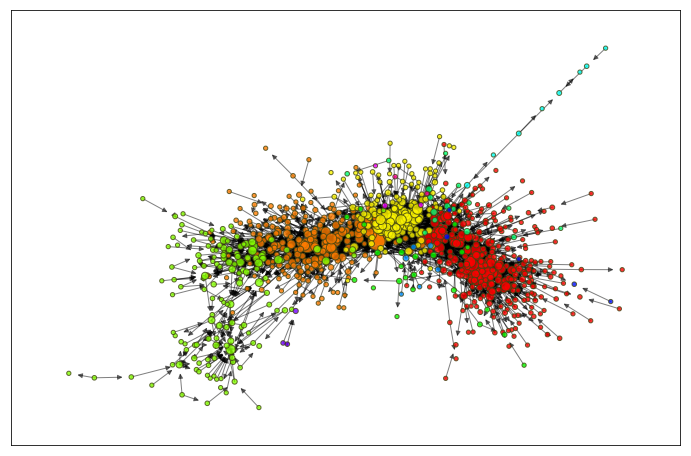

In [38]:
# Visualizamos la dirección de las aristas
plt.figure(num=None, figsize=(12, 8))
nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=["#414412"])